# Import all required libraries for the project

In [10]:
import pandas as pd
import numpy as np
import math
import string
import datetime
import chardet
import warnings
warnings.filterwarnings("ignore")
import os
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

sns.color_palette('bright')
sns.set(style='darkgrid',rc = {'figure.figsize':(15,8)})

from sklearn.pipeline import make_pipeline 
%matplotlib inline


# Importing And Analyzing The Dataset

In [11]:
dataset = pd.read_csv('creditcard.csv')
dataset.head() #see first 5 rows in the dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
dataset.shape

(52605, 31)

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52605 entries, 0 to 52604
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    52605 non-null  int64  
 1   V1      52605 non-null  float64
 2   V2      52605 non-null  float64
 3   V3      52605 non-null  float64
 4   V4      52605 non-null  float64
 5   V5      52605 non-null  float64
 6   V6      52605 non-null  float64
 7   V7      52605 non-null  float64
 8   V8      52605 non-null  float64
 9   V9      52605 non-null  float64
 10  V10     52605 non-null  float64
 11  V11     52605 non-null  float64
 12  V12     52605 non-null  float64
 13  V13     52605 non-null  float64
 14  V14     52605 non-null  float64
 15  V15     52605 non-null  float64
 16  V16     52605 non-null  float64
 17  V17     52605 non-null  float64
 18  V18     52605 non-null  float64
 19  V19     52605 non-null  float64
 20  V20     52605 non-null  float64
 21  V21     52605 non-null  float64
 22

In [14]:
# drop time
dataset.drop('Time', axis=1,inplace=True)

In [15]:
#rechacking the data
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
# Checking for any NaN values in Datset
dataset.isna().any()

V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

# Visualization Data

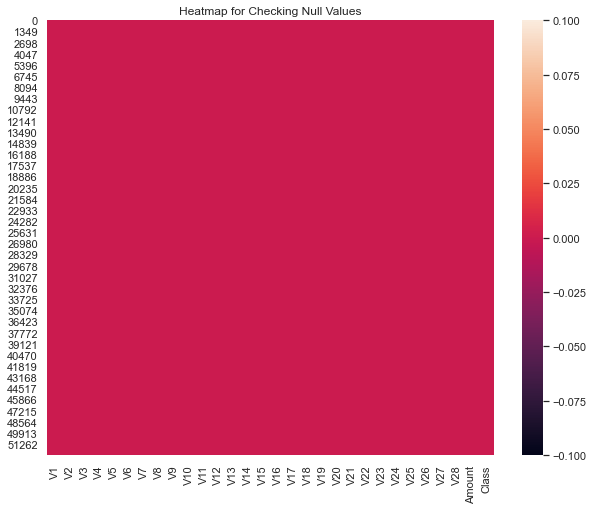

In [17]:
# visualizing the null values
plt.figure(figsize=(10,8))
sns.heatmap(dataset.isnull())
plt.title('Heatmap for Checking Null Values')
plt.show()

# Splitting data in Training and Testing sets

In [18]:
# Assigning x and y values for training and testong
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [19]:
# Checking x and y values
print(x[0])
print(y[0])

[-1.35980713e+00 -7.27811730e-02  2.53634674e+00  1.37815522e+00
 -3.38320770e-01  4.62387778e-01  2.39598554e-01  9.86979010e-02
  3.63786970e-01  9.07941720e-02 -5.51599533e-01 -6.17800856e-01
 -9.91389847e-01 -3.11169354e-01  1.46817697e+00 -4.70400525e-01
  2.07971242e-01  2.57905800e-02  4.03992960e-01  2.51412098e-01
 -1.83067780e-02  2.77837576e-01 -1.10473910e-01  6.69280750e-02
  1.28539358e-01 -1.89114844e-01  1.33558377e-01 -2.10530530e-02
  1.49620000e+02]
0


In [20]:
# Train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [21]:
# Printing the trainig and testing data 
print('X_training, set shape{}, x_test set shape{}'.format(x_train.shape, x_test.shape))
print('Y_training set shape{}, y_test set shape{}'.format(y_train.shape, y_test.shape))

X_training, set shape(36823, 29), x_test set shape(15782, 29)
Y_training set shape(36823,), y_test set shape(15782,)


# Feature scaling

In [22]:
# standard feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,:] = sc.fit_transform(x_train[:, :])
x_test[:,:] = sc.transform(x_test[:,:])

In [23]:
print(x_train)

[[ 0.87416632 -0.46265536 -0.0554003  ...  0.07214229  0.05460732
  -0.22750384]
 [-0.17285591 -0.03439909  1.17042474 ...  0.39455615  0.50489085
  -0.32553658]
 [ 0.35571066 -0.67227444  0.26279787 ... -0.08653236  0.27559371
   1.17169814]
 ...
 [ 0.80467886 -0.2445024  -0.01671306 ... -0.15365139 -0.00423236
  -0.31712332]
 [-0.32137818  0.37750341 -0.51377882 ...  0.41031072  0.78990788
  -0.34577717]
 [ 0.66593391  0.20527139 -0.56448697 ... -0.18309562  0.03311839
   0.07630825]]


In [24]:
# Preparing Classification Models
from sklearn.linear_model import LogisticRegression

In [25]:
classifier_regressor = LogisticRegression(random_state = 0)
classifier_regressor.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [26]:
y_pred_regressor = classifier_regressor.predict(x_test)

In [27]:
y_pred_regressor

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# KNN training

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric='minkowski', p=2)
classifier_knn.fit(x_train, y_train)

KNeighborsClassifier()

In [30]:
y_pred_knn = classifier_knn.predict(x_test)

# SVM training

In [31]:
from sklearn.svm import SVC

In [32]:
classifier_svm = SVC(kernel = 'linear', random_state=0)
classifier_svm.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [33]:
y_pred_svm = classifier_svm.predict(x_test)

In [34]:
# kernal svm training
classifier_ksvm = SVC(kernel ='rbf', random_state = 0)
classifier_ksvm.fit(x_train, y_train)

SVC(random_state=0)

In [35]:
y_pred_ksvm = classifier_ksvm.predict(x_test)

# naive bayes training

In [36]:
from sklearn.naive_bayes import GaussianNB

In [37]:
classifier_nb = GaussianNB()
classifier_nb.fit(x_train, y_train)

GaussianNB()

In [38]:
y_pred_nb = classifier_nb.predict(x_test)

# Decision Tree training

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [41]:
y_pred_dt = classifier_dt.predict(x_test)

# Random forest training

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rf.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [44]:
y_pred_rf = classifier_rf.predict(x_test)

In [45]:
y_pred = pd.DataFrame()
y_pred_knn = y_pred_knn

In [46]:
y_pred['SVM'] = y_pred_svm
y_pred['ksvm'] = y_pred_ksvm
y_pred['navie bayes'] = y_pred_nb
y_pred['decision tree'] = y_pred_dt
y_pred['random forest'] = y_pred_rf

In [47]:
y_pred['real values'] = y_test

In [48]:
y_pred

,SVM,ksvm,navie bayes,decision tree,random forest,real values
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
15777,0,0,0,0,0,0
15778,0,0,0,0,0,0
15779,0,0,0,0,0,0
15780,0,0,0,0,0,0


# Confusion matrix regressor

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [50]:
cm_regressor = confusion_matrix(y_test, y_pred_regressor)
print(cm_regressor)

[[15718    10]
 [   19    35]]


In [51]:
print("Accuracy score of the model:",accuracy_score(y_test, y_pred_regressor))

Accuracy score of the model: 0.998162463566088


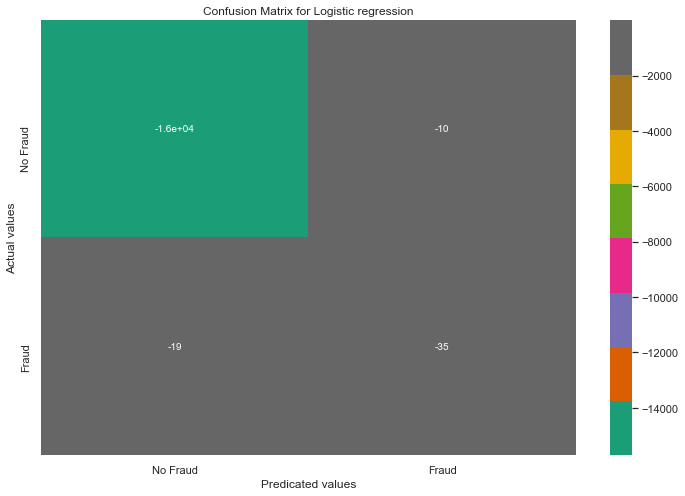

In [52]:
# Visualizing confusion matrix
mat =- confusion_matrix(y_test, y_pred_regressor)
plt.figure(figsize=(12,8))
sns.heatmap(data=mat, annot =True, cmap='Dark2', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicated values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic regression')
plt.show()

In [53]:
#Confusion matrix knn
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

[[15726     2]
 [   10    44]]


In [54]:
print("Accuracy score of KNN: ", accuracy_score(y_test, y_pred_knn))

Accuracy score of KNN:  0.9992396400963123


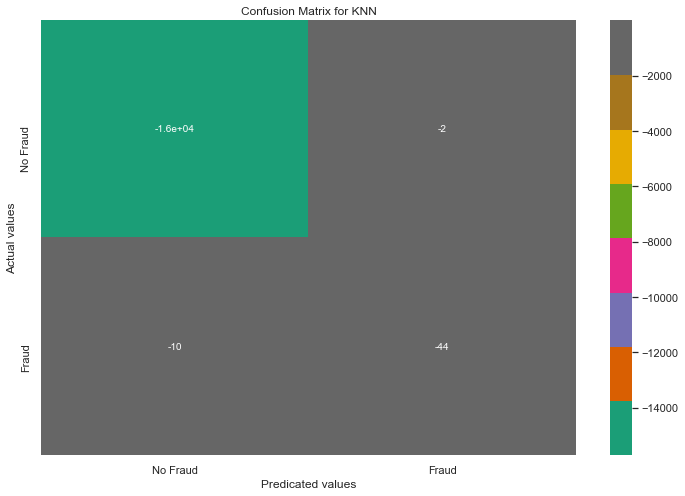

In [55]:
# Visualizing confusion matrix
mat =- confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(12,8))
sns.heatmap(data=mat, annot =True, cmap='Dark2', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicated values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for KNN')
plt.show()

In [56]:
# Confusion matrix svm
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

[[15719     9]
 [   16    38]]


In [57]:
print("The Accuracy score of SVM: ", accuracy_score(y_test, y_pred_svm))

The Accuracy score of SVM:  0.9984159168673172


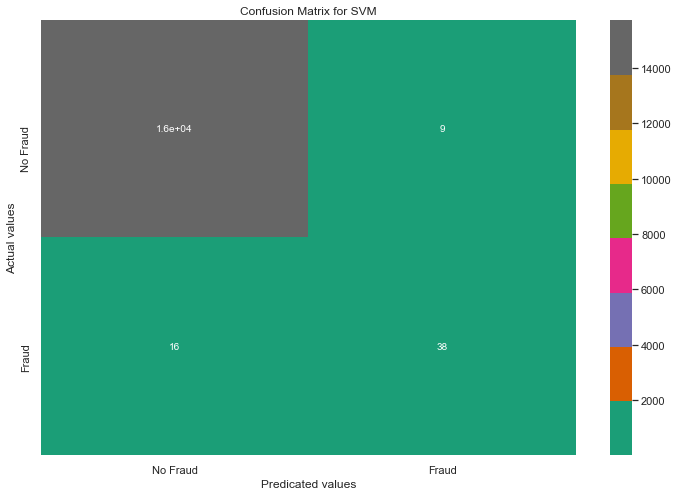

In [58]:
# Visualizing confusion matrix
mat = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(12,8))
sns.heatmap(data=mat, annot =True, cmap='Dark2', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicated values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for SVM')
plt.show()

In [59]:
# Confusion matrix ksvm
cm_ksvm = confusion_matrix(y_test, y_pred_ksvm)
print(cm_ksvm)

[[15727     1]
 [   20    34]]


In [60]:
print("The Accuracy score of KSVM model: ", accuracy_score(y_test, y_pred_ksvm))

The Accuracy score of KSVM model:  0.9986693701685464


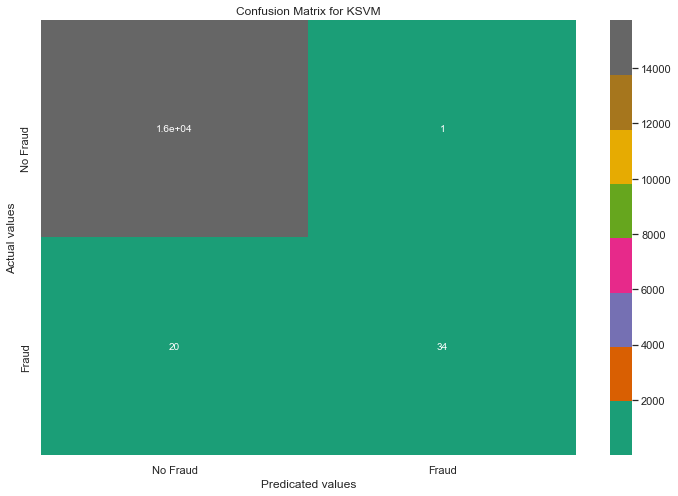

In [61]:
# Visualizing confusion matrix
mat = confusion_matrix(y_test, y_pred_ksvm)
plt.figure(figsize=(12,8))
sns.heatmap(data=mat, annot =True, cmap='Dark2', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicated values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for KSVM')
plt.show()

In [62]:
# Confusion matrix naive bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
print(cm_nb)

[[15394   334]
 [    6    48]]


In [63]:
print("The accuracy score of naive bayes: ", accuracy_score(y_test, y_pred_nb))

The accuracy score of naive bayes:  0.9784564693955139


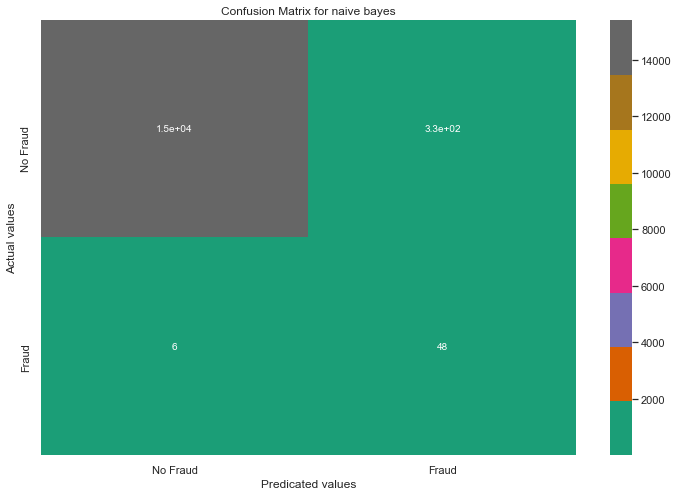

In [64]:
# Visualizing confusion matrix
mat = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(12,8))
sns.heatmap(data=mat, annot =True, cmap='Dark2', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicated values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for naive bayes')
plt.show()

In [65]:
# Confusion matrix decision tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

[[15723     5]
 [    8    46]]


In [66]:
print("The Accuracy score of Decision Tree: ", accuracy_score(y_test, y_pred_dt))

The Accuracy score of Decision Tree:  0.999176276771005


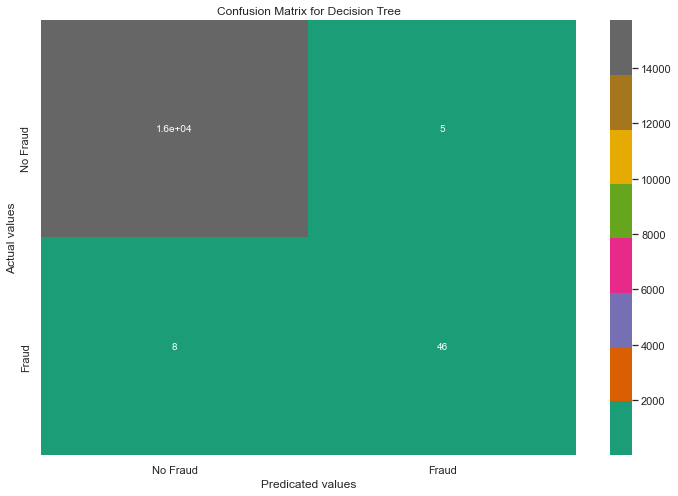

In [67]:
# Visualizing confusion matrix
mat = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(12,8))
sns.heatmap(data=mat, annot =True, cmap='Dark2', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicated values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

In [68]:
# Confusion matrix random forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

[[15727     1]
 [   13    41]]


In [69]:
print("The Accuracyscore of Random Forest model: ", accuracy_score(y_test, y_pred_rf))

The Accuracyscore of Random Forest model:  0.9991129134456976


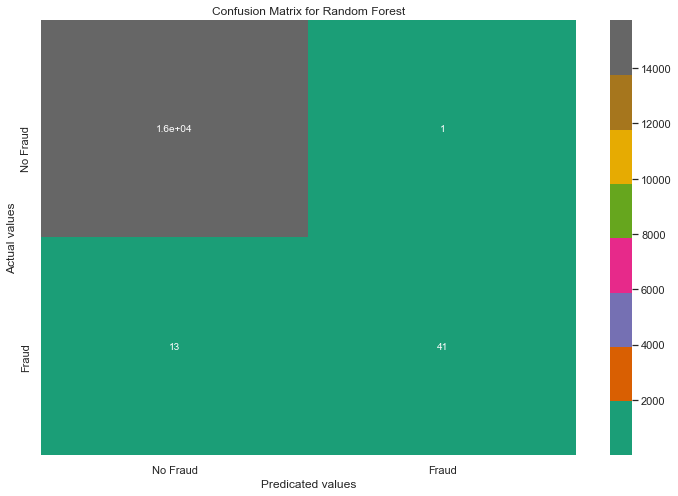

In [70]:
# Visualizingconfusion matrix
mat = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(12,8))
sns.heatmap(data=mat, annot =True, cmap='Dark2', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicated values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [71]:
import pickle

In [72]:
file = open('Fraud_Detection.pkl', 'wb')
pickle.dump(classifier_rf, file)